In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

In [2]:
df = pd.read_csv('post natal data.csv')
df.head()

,Timestamp,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling anxious,Feeling of guilt,Problems of bonding with baby,Suicide attempt
0,6/14/2022 20:02,35-40,Yes,Yes,Two or more days a week,Yes,Yes,Yes,No,Yes,Yes
1,6/14/2022 20:03,40-45,Yes,No,No,Yes,Yes,No,Yes,Yes,No
2,6/14/2022 20:04,35-40,Yes,No,Yes,Yes,Yes,Yes,No,Sometimes,No
3,6/14/2022 20:05,35-40,Yes,Yes,Yes,Yes,No,Yes,Maybe,No,No
4,6/14/2022 20:06,40-45,Yes,No,Two or more days a week,Yes,No,Yes,No,Yes,No


In [3]:
#is null
df.isna().sum()

Timestamp                                     0
Age                                           0
Feeling sad or Tearful                        0
Irritable towards baby & partner              6
Trouble sleeping at night                     0
Problems concentrating or making decision    12
Overeating or loss of appetite                0
Feeling anxious                               0
Feeling of guilt                              9
Problems of bonding with baby                 0
Suicide attempt                               0
dtype: int64

In [4]:
#drop 
df = df.dropna()

In [5]:
df.isna().sum()

Timestamp                                    0
Age                                          0
Feeling sad or Tearful                       0
Irritable towards baby & partner             0
Trouble sleeping at night                    0
Problems concentrating or making decision    0
Overeating or loss of appetite               0
Feeling anxious                              0
Feeling of guilt                             0
Problems of bonding with baby                0
Suicide attempt                              0
dtype: int64

In [6]:
df['year'] = pd.DatetimeIndex(df['Timestamp']).year

In [7]:
df['month'] = pd.DatetimeIndex(df['Timestamp']).month

In [8]:
df.head()

,Timestamp,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling anxious,Feeling of guilt,Problems of bonding with baby,Suicide attempt,year,month
0,6/14/2022 20:02,35-40,Yes,Yes,Two or more days a week,Yes,Yes,Yes,No,Yes,Yes,2022,6
1,6/14/2022 20:03,40-45,Yes,No,No,Yes,Yes,No,Yes,Yes,No,2022,6
2,6/14/2022 20:04,35-40,Yes,No,Yes,Yes,Yes,Yes,No,Sometimes,No,2022,6
3,6/14/2022 20:05,35-40,Yes,Yes,Yes,Yes,No,Yes,Maybe,No,No,2022,6
4,6/14/2022 20:06,40-45,Yes,No,Two or more days a week,Yes,No,Yes,No,Yes,No,2022,6


In [9]:
df = df.drop(['Timestamp'], axis=1)

In [10]:
df.head()

,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling anxious,Feeling of guilt,Problems of bonding with baby,Suicide attempt,year,month
0,35-40,Yes,Yes,Two or more days a week,Yes,Yes,Yes,No,Yes,Yes,2022,6
1,40-45,Yes,No,No,Yes,Yes,No,Yes,Yes,No,2022,6
2,35-40,Yes,No,Yes,Yes,Yes,Yes,No,Sometimes,No,2022,6
3,35-40,Yes,Yes,Yes,Yes,No,Yes,Maybe,No,No,2022,6
4,40-45,Yes,No,Two or more days a week,Yes,No,Yes,No,Yes,No,2022,6


In [11]:
df2 = df.copy()

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [14]:
#encode all the categorical variables
df_encoded = df.apply(le.fit_transform)

In [15]:
df_encoded.head()

,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling anxious,Feeling of guilt,Problems of bonding with baby,Suicide attempt,year,month
0,2,2,2,1,2,2,1,1,2,2,0,0
1,3,2,0,0,2,2,0,2,2,0,0,0
2,2,2,0,2,2,2,1,1,1,0,0,0
3,2,2,2,2,2,0,1,0,0,0,0,0
4,3,2,0,1,2,0,1,1,2,0,0,0


In [16]:
df_encoded = df_encoded.drop(['year','month'], axis=1)

In [17]:
df_encoded.head()

,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling anxious,Feeling of guilt,Problems of bonding with baby,Suicide attempt
0,2,2,2,1,2,2,1,1,2,2
1,3,2,0,0,2,2,0,2,2,0
2,2,2,0,2,2,2,1,1,1,0
3,2,2,2,2,2,0,1,0,0,0
4,3,2,0,1,2,0,1,1,2,0


In [18]:
X = df_encoded.drop(['Feeling anxious'], axis=1)
y = df_encoded['Feeling anxious']

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [23]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('Accuracy score: ', accuracy_score(y_test, y_pred)*100)
print('Classification report: ', classification_report(y_test, y_pred))

Accuracy score:  71.90635451505017
Classification report:                precision    recall  f1-score   support

           0       0.76      0.39      0.52       115
           1       0.71      0.92      0.80       184

    accuracy                           0.72       299
   macro avg       0.74      0.66      0.66       299
weighted avg       0.73      0.72      0.69       299



<AxesSubplot: >

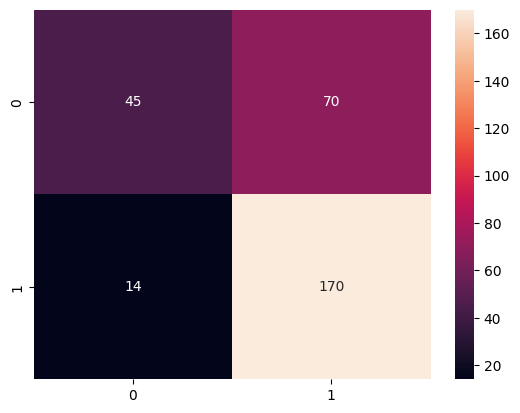

In [24]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')

In [25]:
#Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('Accuracy score: ', accuracy_score(y_test, y_pred)*100)
print('Classification report: ', classification_report(y_test, y_pred))

Accuracy score:  98.66220735785953
Classification report:                precision    recall  f1-score   support

           0       0.98      0.98      0.98       115
           1       0.99      0.99      0.99       184

    accuracy                           0.99       299
   macro avg       0.99      0.99      0.99       299
weighted avg       0.99      0.99      0.99       299



<AxesSubplot: >

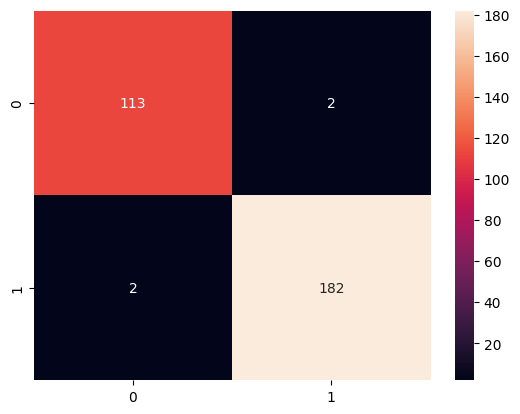

In [26]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')

In [27]:
#XGBoost
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print('Accuracy score: ', accuracy_score(y_test, y_pred)*100)
print('Classification report: ', classification_report(y_test, y_pred))


Accuracy score:  98.66220735785953
Classification report:                precision    recall  f1-score   support

           0       0.98      0.98      0.98       115
           1       0.99      0.99      0.99       184

    accuracy                           0.99       299
   macro avg       0.99      0.99      0.99       299
weighted avg       0.99      0.99      0.99       299



<AxesSubplot: >

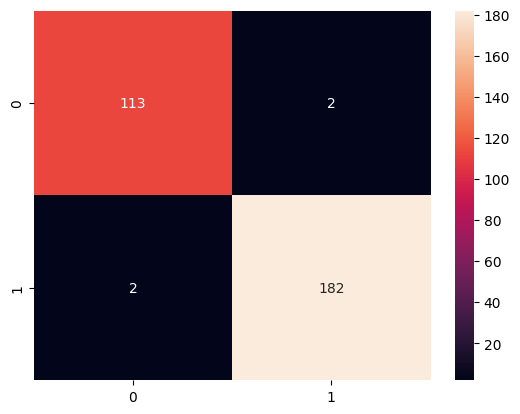

In [28]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')

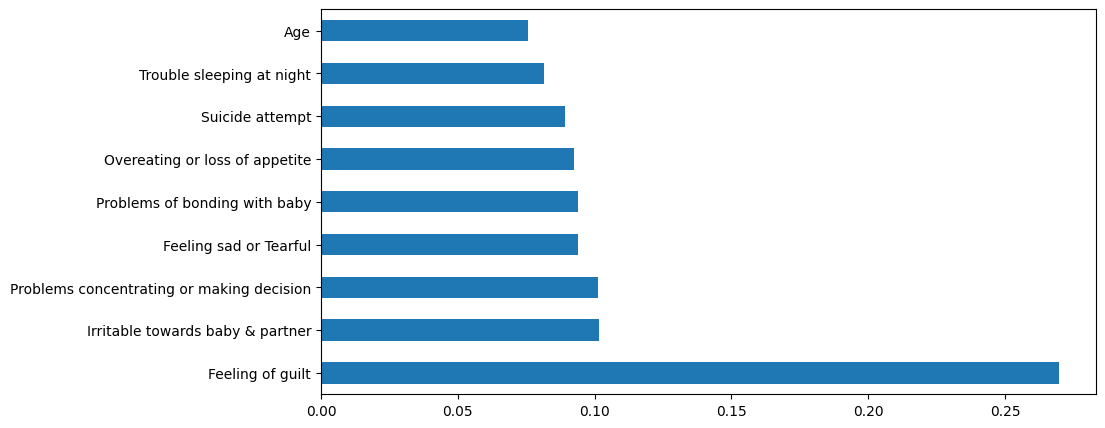

In [30]:
#plotting the feature importance
plt.figure(figsize=(10,5))
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

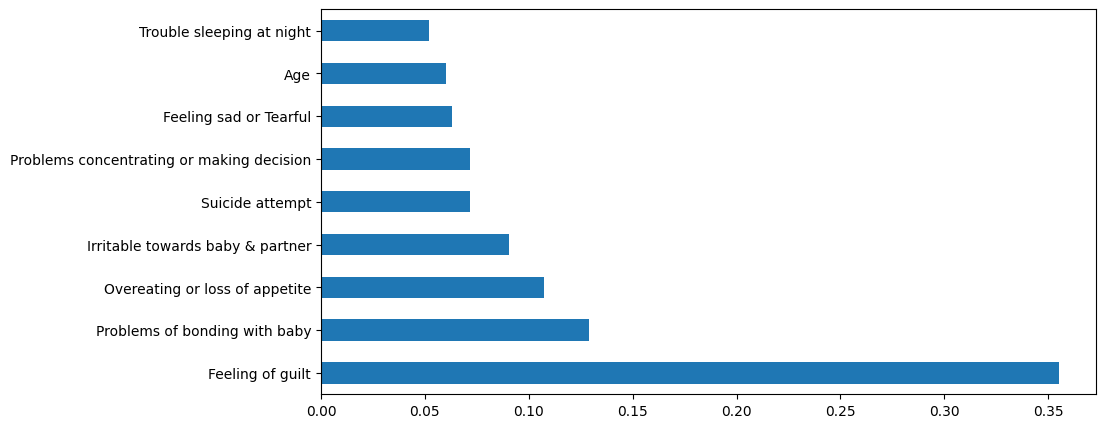

In [31]:
#plotting the feature importance for XGBoost
plt.figure(figsize=(10,5))
feat_importances = pd.Series(xgb.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

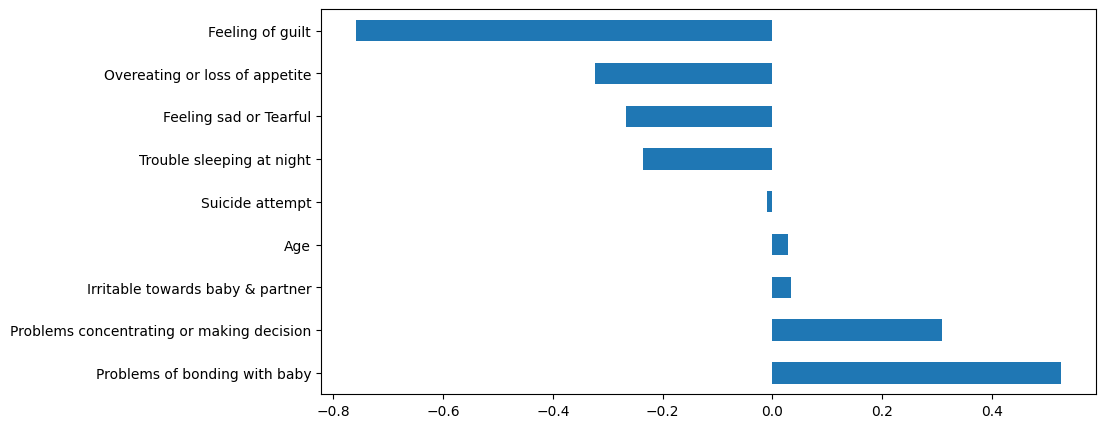

In [32]:
#plotting the feature importance for Logistic Regression
plt.figure(figsize=(10,5))
feat_importances = pd.Series(lr.coef_[0], index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [34]:
#Common features between the three models
feat_importances.nlargest(10).index


Index(['Problems of bonding with baby',
       'Problems concentrating or making decision',
       'Irritable towards baby & partner', 'Age', 'Suicide attempt',
       'Trouble sleeping at night', 'Feeling sad or Tearful',
       'Overeating or loss of appetite', 'Feeling of guilt'],
      dtype='object')

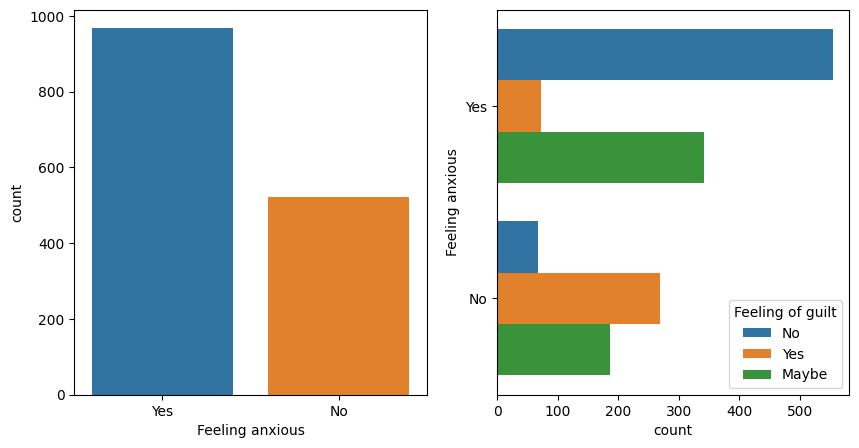

In [37]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
sns.countplot(x='Feeling anxious', data=df, ax=ax1)
sns.countplot(y='Feeling anxious', hue='Feeling of guilt',data=df, ax=ax2)
plt.show()


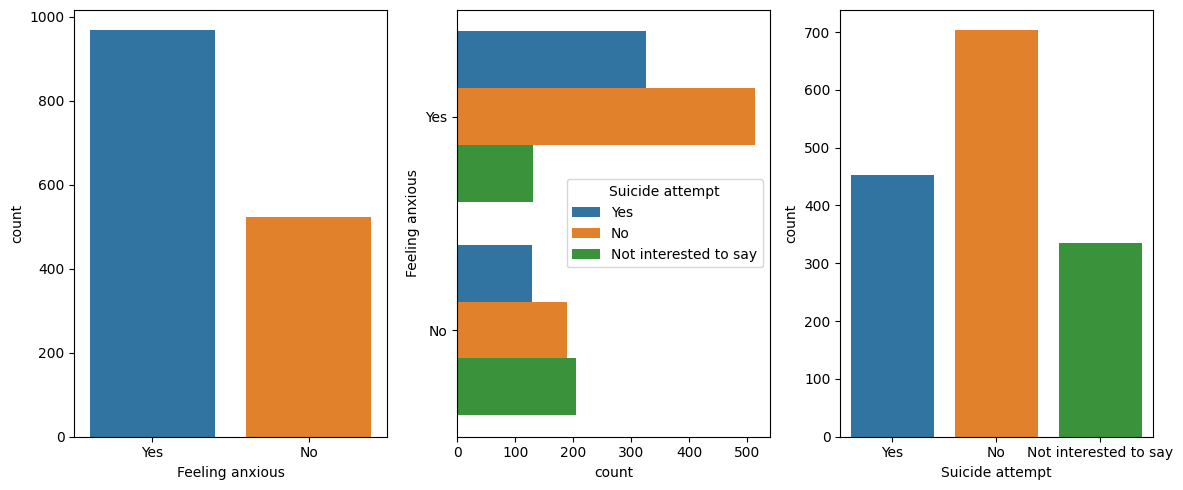

In [41]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(12,5))
sns.countplot(x='Feeling anxious', data=df, ax=ax1)
sns.countplot(y='Feeling anxious', hue='Suicide attempt',data=df, ax=ax2)
sns.countplot(x='Suicide attempt',data=df,ax=ax3)
plt.tight_layout()
plt.show()
